In [1]:
import json
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
test="/home/aalbiol/rasp4/mscan_dvc/dvc_s90_orange/out_evaluate_Alba6_from5/test_scores.json"
val="/home/aalbiol/rasp4/mscan_dvc/dvc_s90_orange/out_evaluate_Alba6_from5/val_scores.json"


with open(test) as f:
    test_scores = json.load(f)
with open(val) as f:
    val_scores = json.load(f)

In [4]:
con=test_scores['test_results']
sin=val_scores['val_results']

valtest=con + sin

In [16]:
for caso in valtest:
    scores=caso['scores']
    defectos=list(scores.keys())
    break
print("Defectos: ", defectos)
# Plotting

Defectos:  ['cracks', 'damage_by_pliers', 'deformed_peduncle', 'green', 'hollow', 'insect', 'light_scars', 'mechanical_damage', 'oil_spots', 'plu_stickers', 'rotten', 'saltamontes', 'scars', 'skin_breakdown', 'sun_burn', 'surface']


In [ ]:
scores_positive = []
scores_negative = []


names_positive = []
names_negative = []
for caso in valtest:
    scores=caso['scores']
    gt=caso['ground_truth']
    gt_rotten=int(gt['rotten'])
    name=caso['filename']
    score_rotten=scores['rotten']
    if gt_rotten==1:
        scores_positive.append(score_rotten)
        names_positive.append(name)
        
    else:
        scores_negative.append(score_rotten)
        names_negative.append(name)


In [6]:
print(len(scores_positive), len(scores_negative))


75 995


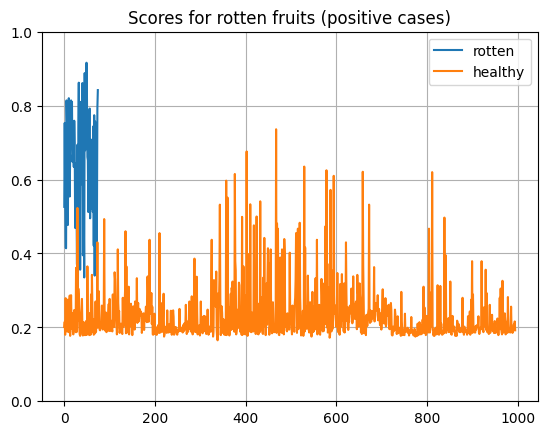

In [8]:
_=plt.plot(scores_positive)
_=plt.plot(scores_negative)

_=plt.grid()
_=plt.legend(['rotten', 'healthy'])
_=plt.ylim(0, 1)
_=plt.title('Scores for rotten fruits (positive cases)')

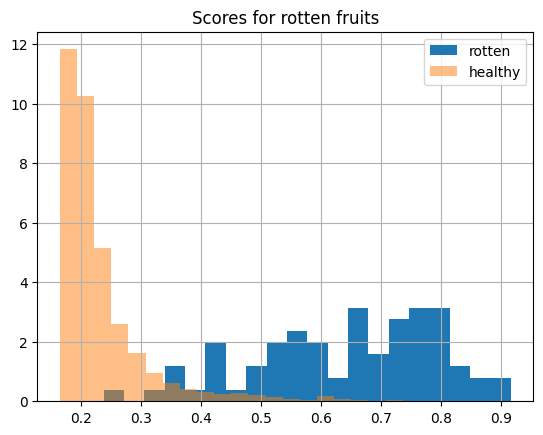

In [17]:
_=plt.hist(scores_positive,bins=20, density=True)
_=plt.hist(scores_negative,bins=20, alpha=0.5,density=True)

_=plt.grid()
_=plt.legend(['rotten', 'healthy'])

_=plt.title('Scores for rotten fruits')

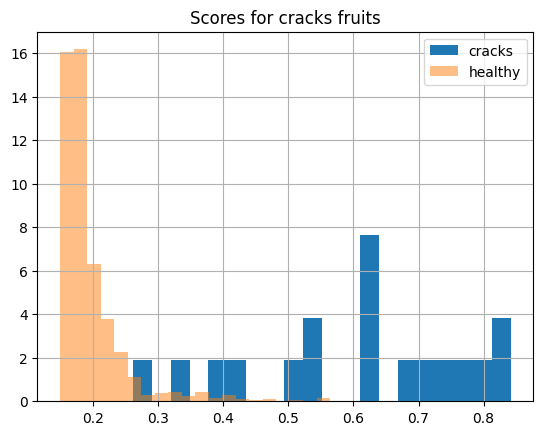

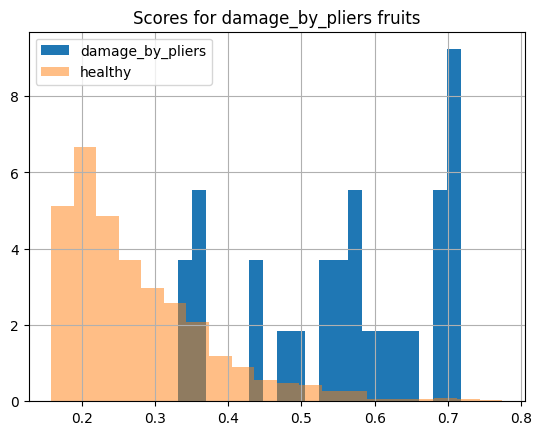

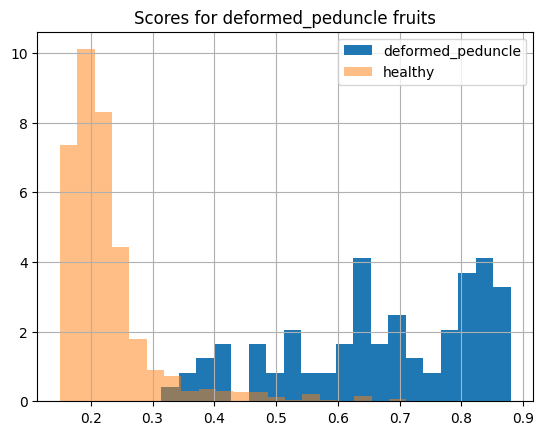

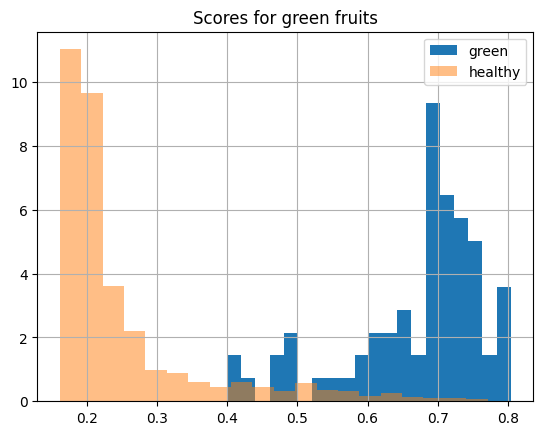

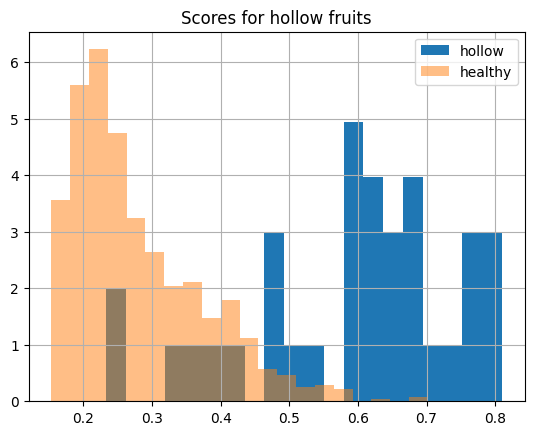

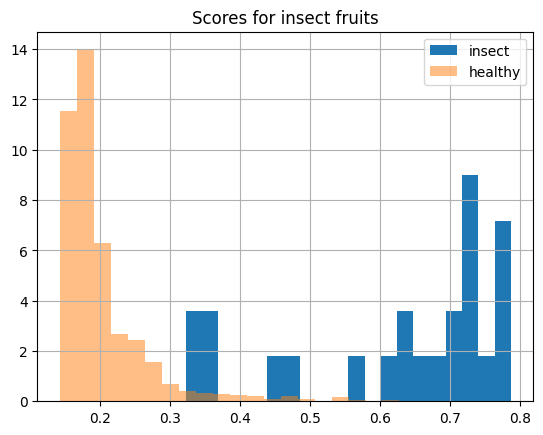

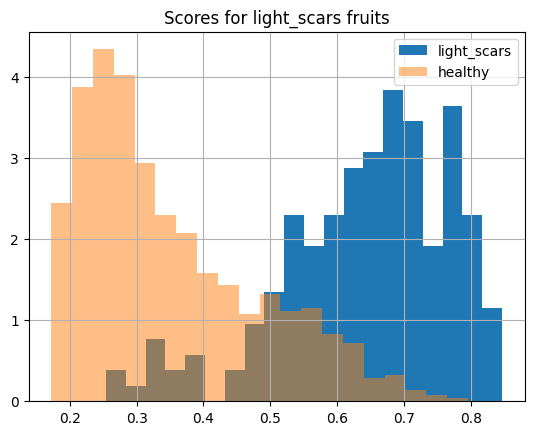

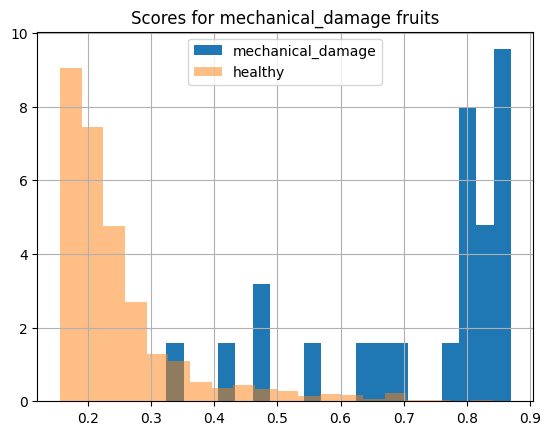

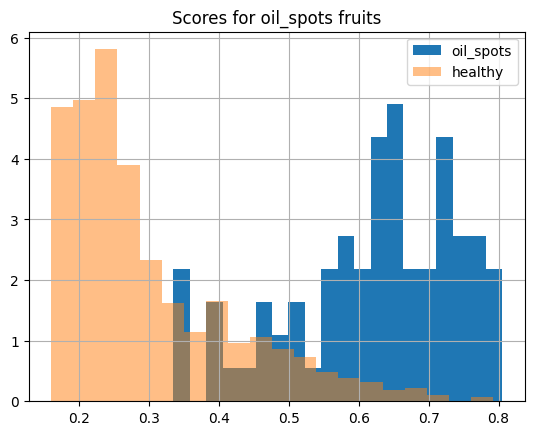

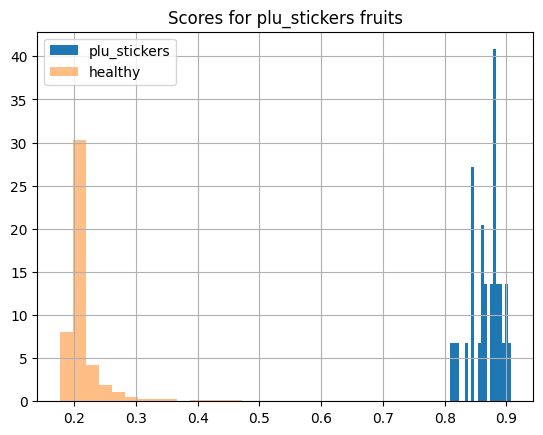

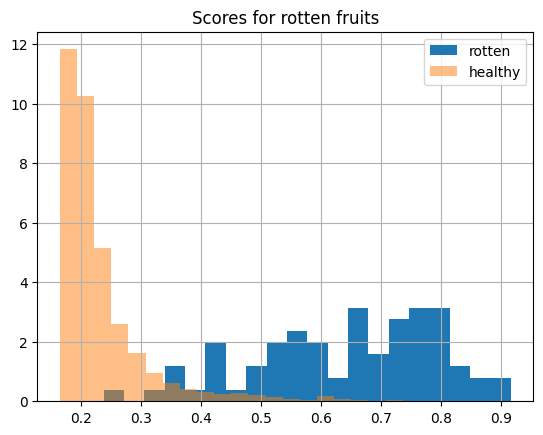

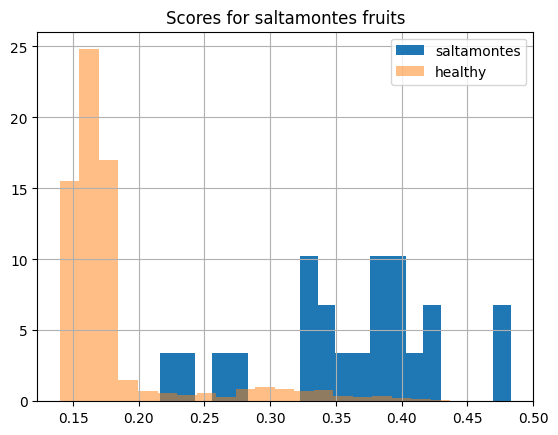

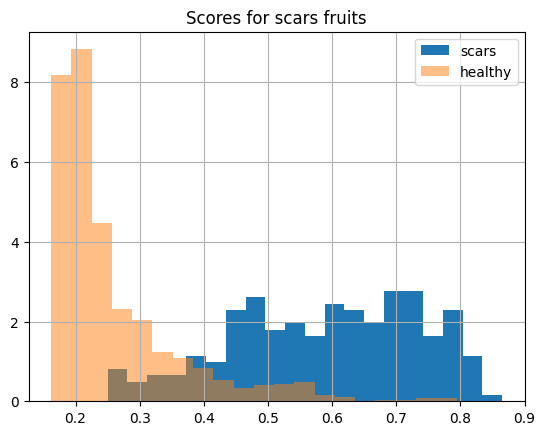

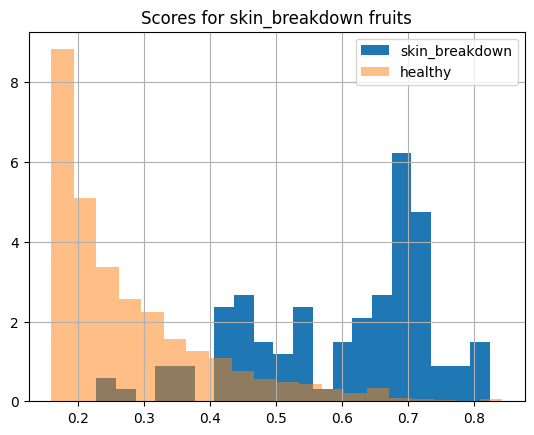

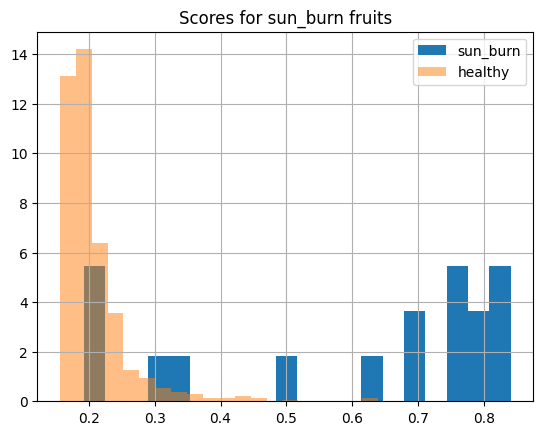

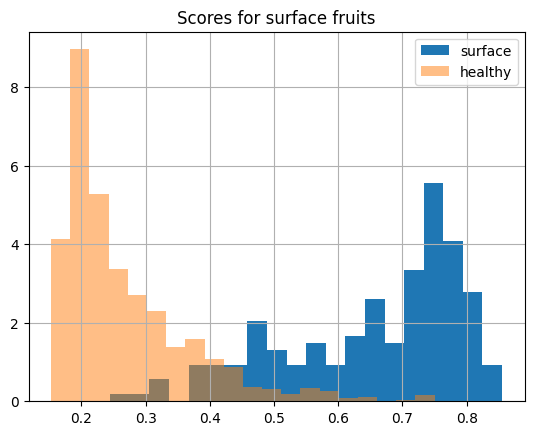

In [18]:
for d in defectos:
    scores_positive = []
    scores_negative = []


    names_positive = []
    names_negative = []
    for caso in valtest:
        scores=caso['scores']
        gt=caso['ground_truth']
        gt_rotten=int(gt[d])
        name=caso['filename']
        score_rotten=scores[d]
        if gt_rotten==1:
            scores_positive.append(score_rotten)
            names_positive.append(name)
            
        else:
            scores_negative.append(score_rotten)
            names_negative.append(name)
    _=plt.figure()
    _=plt.hist(scores_positive,bins=20, density=True)
    _=plt.hist(scores_negative,bins=20, alpha=0.5,density=True)

    _=plt.grid()
    _=plt.legend([d, 'healthy'])

    _=plt.title(f'Scores for {d} fruits')